# Content Based Recommenders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Sample data (user, item, rating)
data = [
    {"user": "Alice", "item": "Guitar", "rating": 5, "description": "String instrument"},
    {"user": "Alice", "item": "Drums", "rating": 3, "description": "Percussion instrument"},
    {"user": "Alice", "item": "Violin", "rating": 4, "description": "String instrument"},  
    {"user": "Bob", "item": "Guitar", "rating": 1, "description": "String instrument"},
    {"user": "Bob", "item": "TV", "rating": 5, "description": "Television"},
    {"user": "Bob", "item": "Radio", "rating": 4, "description": "Audio equipment"},
    {"user": "Bob", "item": "Laptop", "rating": 3, "description": "Computer"}, 
    {"user": "Charlie", "item": "Guitar", "rating": 4, "description": "String instrument"},
    {"user": "Charlie", "item": "Piano", "rating": 5, "description": "Keyboard instrument"},
    {"user": "Charlie", "item": "Drums", "rating": 4, "description": "Percussion instrument"},
    {"user": "Charlie", "item": "Microphone", "rating": 3, "description": "Audio equipment"}, 
    {"user": "David", "item": "Guitar", "rating": 2, "description": "String instrument"}, 
    {"user": "David", "item": "Violin", "rating": 4, "description": "String instrument"},  
    {"user": "David", "item": "Piano", "rating": 3, "description": "Keyboard instrument"}, 
    {"user": "David", "item": "Microphone", "rating": 2, "description": "Audio equipment"}, 
]

# Convert data to DataFrame
df = pd.DataFrame(data)
df

,user,item,rating,description
0,Alice,Guitar,5,String instrument
1,Alice,Drums,3,Percussion instrument
2,Alice,Violin,4,String instrument
3,Bob,Guitar,1,String instrument
4,Bob,TV,5,Television
5,Bob,Radio,4,Audio equipment
6,Bob,Laptop,3,Computer
7,Charlie,Guitar,4,String instrument
8,Charlie,Piano,5,Keyboard instrument
9,Charlie,Drums,4,Percussion instrument


## Popularity Based

In [3]:
# Calculate popularity of each item
popularity = df.groupby('item')['rating'].count().sort_values(ascending=False)

print("Popularity-based recommendation:")
print(popularity)

Popularity-based recommendation:
item
Guitar        4
Drums         2
Microphone    2
Piano         2
Violin        2
Laptop        1
Radio         1
TV            1
Name: rating, dtype: int64


## Content Based

### Similarity Approach

Vocabulary:
['audio' 'computer' 'equipment' 'instrument' 'keyboard' 'percussion'
 'string' 'television']


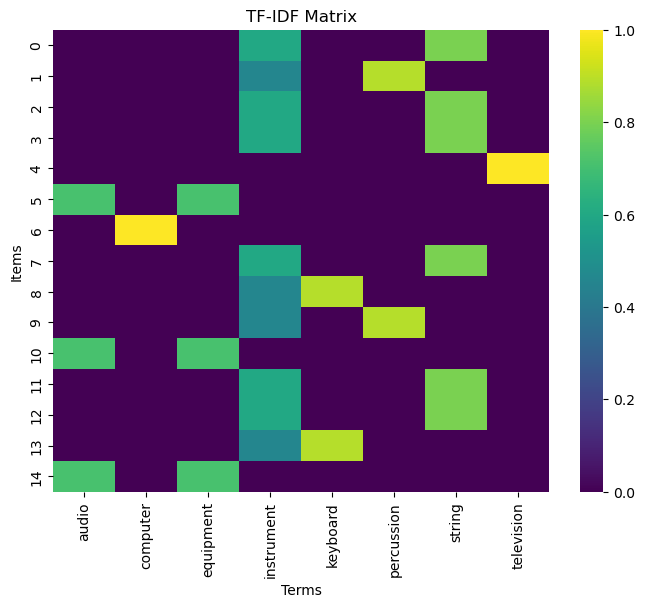

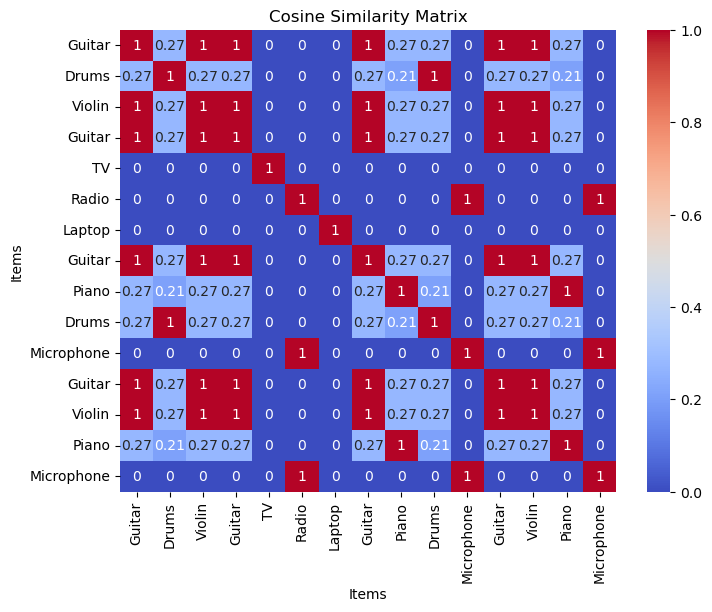

In [4]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Print vocabulary
print("Vocabulary:")
print(tfidf_vectorizer.get_feature_names_out())

# Print TF-IDF matrix
# print("\nTF-IDF Matrix:")
# print(tfidf_matrix.toarray())

# Plot TF-IDF matrix
plt.figure(figsize=(8, 6))
sns.heatmap(tfidf_matrix.toarray(), cmap='viridis', xticklabels=tfidf_vectorizer.get_feature_names_out())
plt.title('TF-IDF Matrix')
plt.xlabel('Terms')
plt.ylabel('Items')
plt.show()

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print similarity matrix
# print("\nCosine Similarity Matrix:")
# print(cosine_sim)

# Plot cosine similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, cmap='coolwarm', xticklabels=df['item'], yticklabels=df['item'], annot=True)
plt.title('Cosine Similarity Matrix')
plt.xlabel('Items')
plt.ylabel('Items')
plt.show()


### Regression Approach

In [5]:
#drop description column
df = df.drop(['description'], axis=1)

# Encode categorical variables (user and item) using one-hot encoding
df = pd.get_dummies(df, columns=['user', 'item'], drop_first=True)

# Split data into train and test sets
X = df.drop('rating', axis=1)
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Training RMSE: 0.14433756729740652
Test RMSE: 1.5000000000000104
